In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
data = pd.read_csv("Datasets/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [40]:
drugy = data.iloc[np.where(data['Drug'].values=="DrugY")]
drugx = data.iloc[np.where(data['Drug'].values=="drugX")]

drug = pd.concat([drugy,drugx])

In [41]:
print((drug['Drug']).value_counts())

DrugY    91
drugX    54
Name: Drug, dtype: int64


In [49]:
sex = dict(enumerate(np.unique(drug['Sex'])))
BP = dict(enumerate(np.unique(drug['BP'])))
Chol = dict(enumerate(np.unique(drug['Cholesterol'])))
Drug = dict(enumerate(np.unique(drug['Drug'])))

In [48]:
def reverse_(dicts):
    return {key:value for value,key in dicts.items()}

In [50]:
drug['Sex'] = drug['Sex'].map(reverse_(sex))
drug['BP'] = drug['BP'].map(reverse_(BP))
drug['Cholesterol'] = drug['Cholesterol'].map(reverse_(Chol))
drug['Drug'] = drug['Drug'].map(reverse_(Drug))

drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
4,61,0,1,0,18.043,0
6,49,0,2,0,16.275,0
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [51]:
X = drug.drop("Drug",axis=1).values
y = drug['Drug'].values

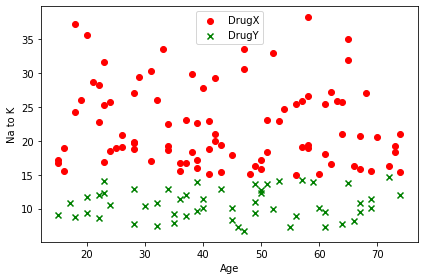

In [53]:
plt.scatter(X[0:90,0],X[:90,-1],color="red",marker="o",label="DrugX")
plt.scatter(X[91:,0],X[91:,-1],color="green",marker="x",label="DrugY")
plt.legend(loc="best")
plt.xlabel("Age")
plt.ylabel("Na to K")
plt.tight_layout()

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [56]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
std.fit(X_test)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2,n_estimators=100)
forest = forest.fit(X_train,y_train)

In [66]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest,threshold=0.1,prefit=True)

In [67]:
X_selected = sfm.transform(X_train)
important = forest.feature_importances_
indices = np.argsort(important)[::-1]

<BarContainer object of 5 artists>

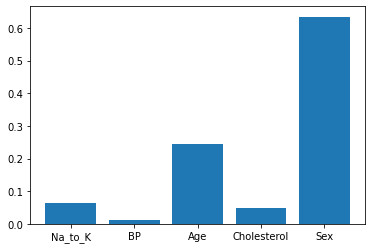

In [68]:
plt.bar(drug.columns[indices],height=important)

In [80]:
X = drug[['Sex','Age']].values
y = drug['Drug'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class="ovr",C=100.0)
lr.fit(X_train,y_train)

LogisticRegression(C=100.0, multi_class='ovr')

In [90]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "*", "^")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor="black")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [85]:
pred = lr.predict(X_test)
np.mean(pred==y_test)

0.6486486486486487

In [87]:
X = drug[['Na_to_K','Age']].values
y = drug['Drug'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [88]:
lr.fit(X_train,y_train)

LogisticRegression(C=100.0, multi_class='ovr')

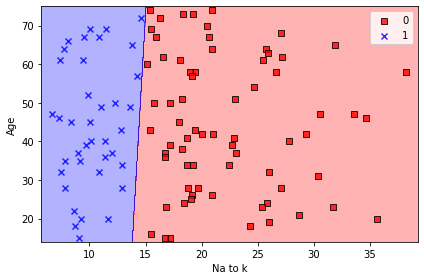

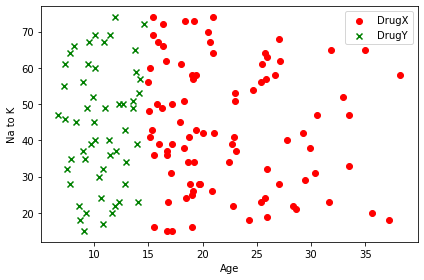

In [106]:
plt.xlabel("Na to k")
plt.ylabel("Age")
plot_decision_regions(X_train,y_train,classifier=lr)

plt.scatter(X[0:90,0],X[:90,-1],color="red",marker="o",label="DrugX")
plt.scatter(X[91:,0],X[91:,-1],color="green",marker="x",label="DrugY")
plt.legend(loc="best")
plt.xlabel("Age")
plt.ylabel("Na to K")
plt.tight_layout()

In [107]:
from sklearn.metrics import classification_report
prediction = lr.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        16

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



In [108]:
print("Accuracy: {}".format(np.mean(y_test==prediction)))

Accuracy: 0.972972972972973
